# LBPandas

Simple diffusive lattice Boltzmann using Pandas data structures

This was written to test my ability to implement and manipulate pandas data structures This simulation is extremely slow as compared to writing this in C, however, this version implements modern data science techniques and is designed to be used as a learning tool. It does imply basic knowledge of the lattice Boltzmann method.

This simulation is currently implemented as a simple one dimensional diffusive system.

I plan to modify and add functionality as I learn more.

## Code Structure

The code is separated into three blocks:
    
    1. Dependencies
    2. Function definitions for algorithm
    3. Main algorithm
    
A script version of this code is available in the same repository under LBpandas.py.

### DISCLAIMER: This code is not intended for any practical simulation implementation due to the fact that it is very slow. It is only meant to be a playground for learning data science techniques in a novel manner.

### Planned Improvements
    1. Build a class structure to eliminate the need for global variables.
    2. Generalize to 2 and 3 dimensions.
    3. Add machine learning functionality to further automation.
    

## Code

### 1. Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 2. Function defintions for algorithm

In [2]:
#Simulation parameters
iterations = 0
xdim = 64
V = 3
theta = 1./3.
n0 = 100
tau = 1
w = pd.Series(np.arange(V), name="weights", dtype="float64")
rho = pd.Series(np.arange(xdim), index=[np.arange(xdim)], name="density", dtype="float64")
#f = pd.DataFrame(np.arange(V*xdim).reshape(xdim,V),
#                 index=[np.arange(xdim)],
#                 columns=np.arange(V), dtype="float64")
f = pd.DataFrame(np.arange(V*xdim).reshape(xdim,V),
                 index=[np.arange(xdim)],
                 columns=["f0", "f1", "f2"], dtype="float64")
        
#Declare and assign the set of weights
def SetWeights():
    global w
    w.iloc[0] = 1 - theta
    w.iloc[1:3] = theta/2
    
#Initialization function
def Initialize():
    global f, rho
    iterations = 0
    SetWeights()
    rho.iloc[np.arange(xdim)] = n0*(1 + np.sin(2*3.14159*np.arange(xdim)/xdim))
    for i in range(xdim):
        f.iloc[i,0] = rho.iloc[i] * w.iloc[0]
        f.iloc[i,1:3] = rho.iloc[i] * w.iloc[1]

#Collision step function        
def Collision():
    global f
    for a in range(V):
        for i in range(xdim):
            f.iloc[i,a] += 1./tau*(rho.iloc[i]*w.iloc[a] - f.iloc[i,a])
            
#Streaming step function
def Stream():
    global f
    f.iloc[:,1] = f.iloc[:,1].shift(1, fill_value=f.iloc[xdim-1,1])
    f.iloc[:,2] = f.iloc[:,2].shift(-1, fill_value=f.iloc[0,2])

#Main iteration function - used to advance time
def Iteration():
    global rho
    for i in range(xdim):
        rho.iloc[i] = f.iloc[i].sum()
    Collision()
    Stream()
    global iterations
    iterations = iterations + 1

#Simple plotting function.
    #Note that this outputs the density as a function of position: rho(x)
def PlotData():                       #Modify this to automatically set the axes based on 
    #Plot output                      #initial parameters
    t = np.arange(0,xdim,1)
    s = rho
    fig, ax = plt.subplots()
    ax.plot(t,s)
    plt.xlim(0,xdim)
    plt.ylim(-10,210)
    plt.xlabel("Lattice Position")
    plt.gca().set_ylabel(r'$\rho$')
    plt.show()

### 3. Main algorithm

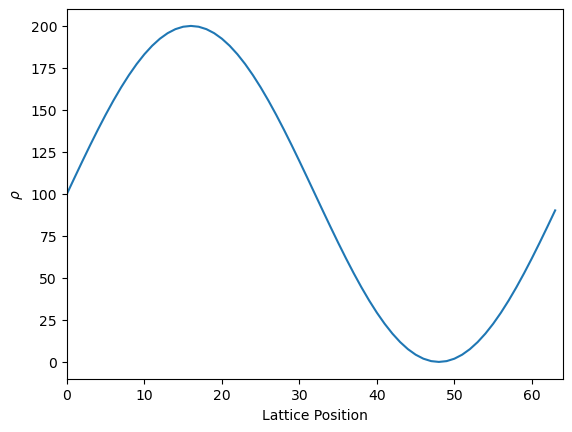

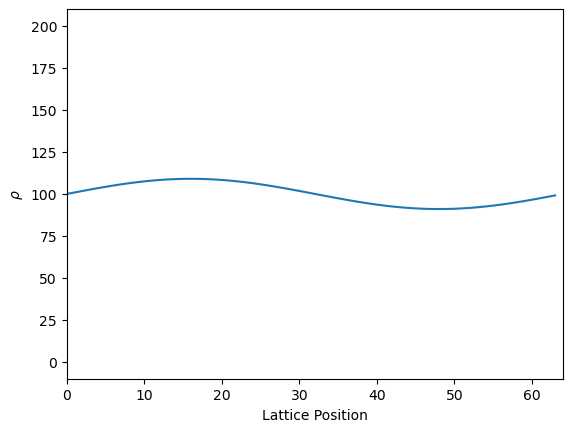

In [3]:
Initialize()
PlotData()
while iterations < 1500:
    Iteration()
PlotData()
outputdata = pd.merge(f,rho, left_index=True, right_index=True)
outputdata.to_csv("output.csv")
